In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence

data_path = "../data/"
house = pd.read_csv(data_path + "houseprice.csv")


#### houseprice.csv는 주택판매가격(price)과 이에 영향을 줄 것으로 판단되는 4가지 설명변수인 세금(tax; 만원), 대지평수(ground; 평), 건물평수(floor; 평), 주택연령(year; 년)을 27개 주택에 대해 조사한 것이다. 

#### 1. 5개 변수들에 대한 산점도 행렬을 작성하고 변수들 간의 관계를 설명하여라. 

#### 1행) 선형으로 보이기는 하나 문제가 되는 점들이 보임. 마지막 차트 제외 

In [2]:
house.head()

,price,tax,ground,floor,year
0,12.95,98.352,34.72,19.96,4.2
1,14.75,100.416,35.31,30.00,6.2
2,13.95,90.858,22.75,23.50,4.0
3,12.95,91.146,40.50,24.64,5.4
4,14.95,101.194,44.55,22.42,4.2


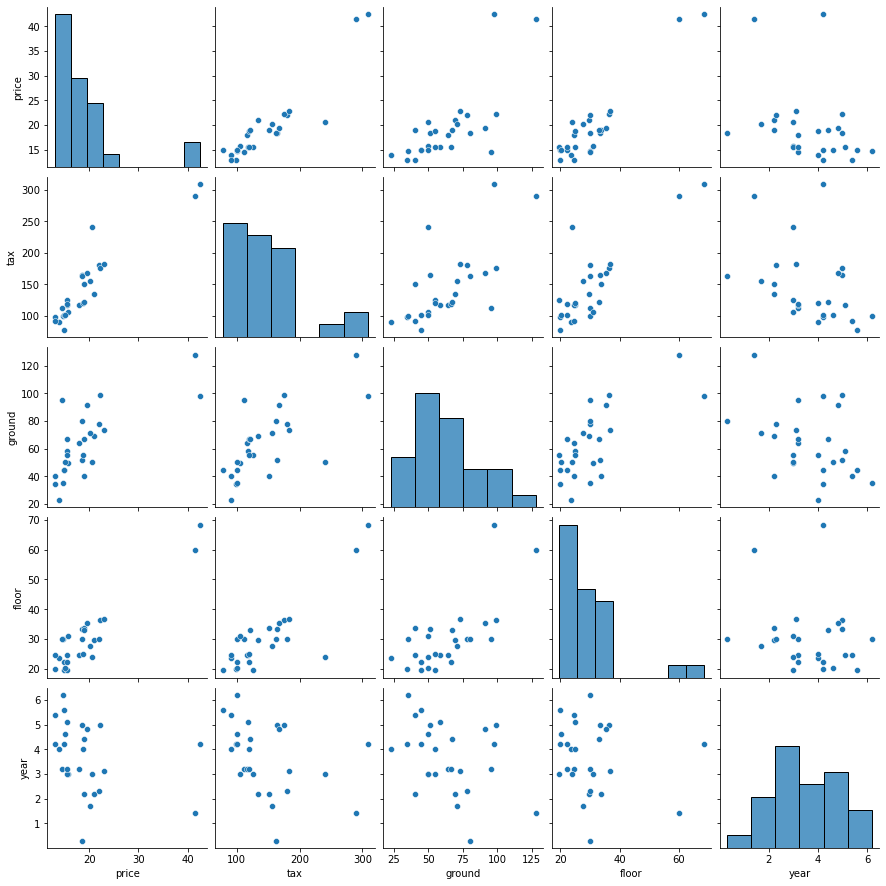

In [3]:
sns.pairplot(house)
plt.show()

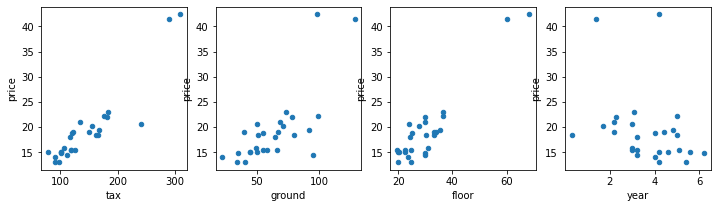

In [4]:
fig, axes = plt.subplots(1, 4, figsize=(12, 3))
house.plot.scatter('tax', 'price', ax = axes[0])
house.plot.scatter('ground', 'price', ax = axes[1])
house.plot.scatter('floor', 'price', ax = axes[2])
house.plot.scatter('year', 'price', ax = axes[3])
plt.show()


#### 2. 주택 판매가격을 종속변수로, 나머지 4개 변수를 설명변수로 하는 선형회귀모형을 적합하여라. 

#### y= 1.2187+0.052x1+0.012x2+0.349x3-0.219x4
#### 1.12187+0.052x1+0.349x3 -> 다시 fitting 필요

In [5]:
model = smf.ols('price~tax+ground+floor+year', data = house).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     74.53
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           1.82e-12
Time:                        17:57:21   Log-Likelihood:                -54.781
No. Observations:                  27   AIC:                             119.6
Df Residuals:                      22   BIC:                             126.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2187      2.047      0.595      0.558      -3.026       5.463
tax            0.0519      0.014      3.756      0.001       0.023       0.081
ground         0.0116      0.025      0.458      0.652      -0.041       0.064
floor          0.3494      0.073      4.807      0.000       0.199       0.500
year          -0.2189      0.331     -0.660      0.516      -0.906       0.469
==============================================================================
Omnibus:                        0.837   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.737
Skew:                           0.014   Prob(JB):                        0.692
Kurtosis:                       2.191   Cond. No.                         903.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
model1 = smf.ols('price~tax+ground+floor', data = house).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     101.7
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           2.03e-13
Time:                        17:57:21   Log-Likelihood:                -55.046
No. Observations:                  27   AIC:                             118.1
Df Residuals:                      23   BIC:                             123.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1368      1.212      0.113      0.911      -2.370       2.643
tax            0.0551      0.013      4.310      0.000       0.029       0.082
ground         0.0165      0.024      0.691      0.497      -0.033       0.066
floor          0.3331      0.068      4.933      0.000       0.193       0.473
==============================================================================
Omnibus:                        1.056   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.590   Jarque-Bera (JB):                0.820
Skew:                          -0.004   Prob(JB):                        0.664
Kurtosis:                       2.146   Cond. No.                         537.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3.	결정계수는 얼마인가? 주택 판매가격에 유의한 영향을 주는 변수들은 무엇인가?

#### tax, floor

In [7]:
model.rsquared

0.9312715052594146

#### 4.  회귀진단을 위한 그래프들을 그리고 모형이 적절한지 판단하여라. Influential point가 있는가? 이들을 제외하면 회귀분석 결과에 영향을 줄 것으로 예상되는가? 

In [8]:
model_house = smf.ols('price~tax+floor+ground', data = house).fit()
model_house.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.1368,1.212,0.113,0.911,-2.370,2.643
tax,0.0551,0.013,4.310,0.000,0.029,0.082
floor,0.3331,0.068,4.933,0.000,0.193,0.473
ground,0.0165,0.024,0.691,0.497,-0.033,0.066


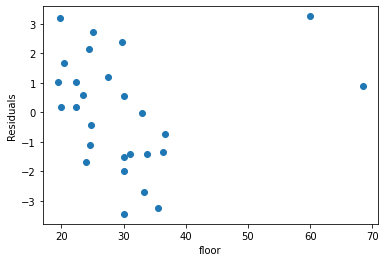

In [9]:
plt.scatter(house.floor,model_house.resid)
plt.xlabel('floor')
plt.ylabel('Residuals')
plt.show()

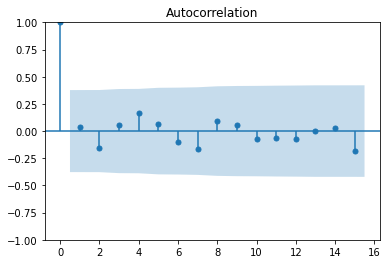

In [10]:
# group에 의해 발생하는 correlation 을 모형에 고려 : 
# Multilevel model / hierarchical linear model
sm.graphics.tsa.plot_acf(model.resid) # auto correlation function 자기상관함수를 그래프로 그리는
plt.show()

# x축: lag


In [11]:
model.resid

0     0.164737
1    -1.219487
2     0.412151
3    -0.900424
4     1.043582
5     3.493788
6    -0.123694
7    -3.489145
8     1.093663
9     3.065654
10    2.069837
11   -1.742842
12    0.968897
13    0.133710
14    1.833845
15   -2.467361
16    2.056301
17    0.876718
18    0.457414
19    2.766962
20   -1.897083
21   -0.877191
22    0.039608
23   -2.883350
24   -2.598174
25   -0.782791
26   -1.495324
dtype: float64

In [12]:
model.fittedvalues

0     12.785263
1     15.969487
2     13.537849
3     13.850424
4     13.906418
5     11.456212
6     15.573694
7     17.939145
8     41.356337
9     38.384346
10    15.880163
11    17.492842
12    14.531103
13    15.316290
14    13.166155
15    20.917361
16    18.893699
17    19.373282
18    21.492586
19    15.983038
20    20.847083
21    23.127191
22    18.910392
23    22.333350
24    21.048174
25    23.682791
26    21.995324
dtype: float64

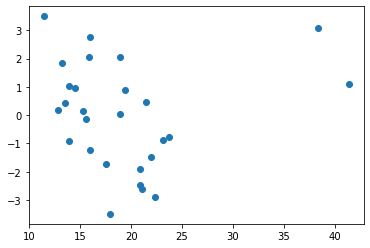

In [13]:
plt.scatter(model.fittedvalues, model.resid)

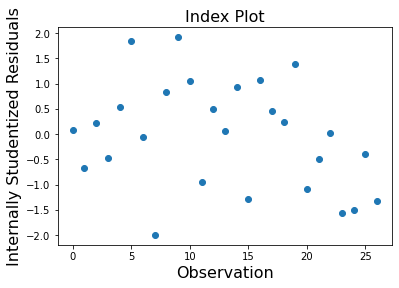

In [14]:
inf = OLSInfluence(model)
inf.plot_index('resid', threshold=3)
plt.show()

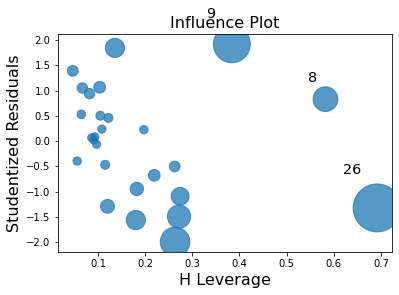

In [15]:
inf.plot_influence()
plt.show()

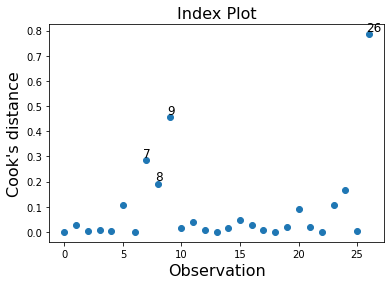

In [16]:
inf.plot_index('cook',threshold=4/(model.nobs-4-1))
plt.show()

In [17]:
idx = [7,8,9,26]
house.iloc[idx,:]
# 8,9번은 price, tax, ground, floor 가 높은 집
# 7은 price는 낮은데 price에 비해 ground가 크다.
# 26 price는 평균인데 price에 비해 tax가 높음

,price,tax,ground,floor,year
7,14.45,112.186,95.2,30.02,3.2
8,42.45,308.404,98.0,68.40,4.2
9,41.45,289.196,128.0,60.00,1.4
26,20.50,240.000,50.0,24.00,3.0


In [18]:
house.describe()

,price,tax,ground,floor,year
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,19.250000,144.898815,63.475556,30.241481,3.648148
std,7.153751,57.640439,24.036766,11.165303,1.405311
min,12.950000,77.820000,22.750000,19.500000,0.300000
25%,14.975000,103.600000,47.216500,23.750000,3.000000
50%,18.450000,121.862000,58.500000,29.760000,4.000000
75%,20.375000,166.071000,75.631000,33.160000,4.700000
max,42.450000,308.404000,128.000000,68.400000,6.200000


In [19]:
house['mark'] = 0
house.loc[house.index.isin(idx), 'mark'] = 1 # mark 열을 추가해 해당 행만 1 추가

In [20]:
house.iloc[idx,:] # mark를 통한 scatter의 색 구분을 위해

,price,tax,ground,floor,year,mark
7,14.45,112.186,95.2,30.02,3.2,1
8,42.45,308.404,98.0,68.40,4.2,1
9,41.45,289.196,128.0,60.00,1.4,1
26,20.50,240.000,50.0,24.00,3.0,1


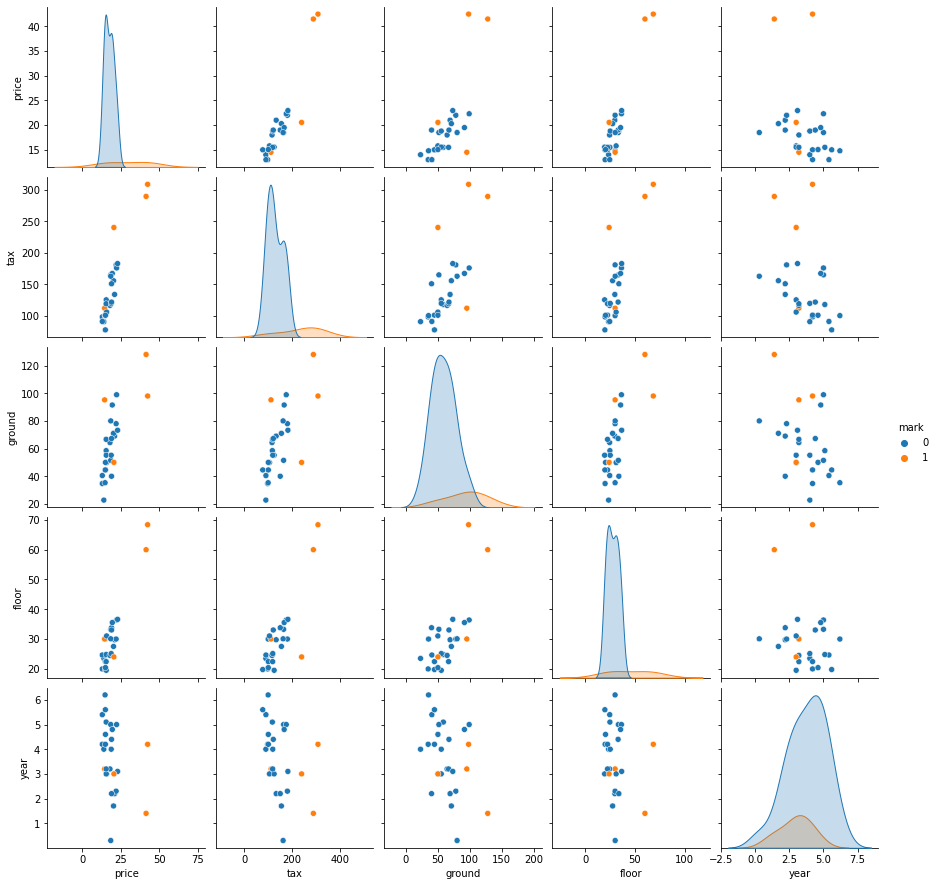

In [21]:
sns.pairplot(house, hue = 'mark')
plt.show()

In [22]:
house2 = house.drop(idx)
model2 = smf.ols('price~tax+ground+floor+year', data = house2).fit()

In [23]:
model2.summary().tables[1] # 영향점을 제거하면 결과가 완전히 달라진다.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.8682,1.936,3.547,0.002,2.800,10.937
tax,0.0379,0.021,1.850,0.081,-0.005,0.081
ground,0.0441,0.024,1.820,0.085,-0.007,0.095
floor,0.1467,0.085,1.723,0.102,-0.032,0.326
year,-0.2495,0.247,-1.010,0.326,-0.768,0.269


In [24]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.2187,2.047,0.595,0.558,-3.026,5.463
tax,0.0519,0.014,3.756,0.001,0.023,0.081
ground,0.0116,0.025,0.458,0.652,-0.041,0.064
floor,0.3494,0.073,4.807,0.000,0.199,0.500
year,-0.2189,0.331,-0.660,0.516,-0.906,0.469


##### H0 : beta1 = 0
##### p-value < 0.05 -> H0를 기가
##### C.I(Confidence Interval)이 0을 포함하면 -> H0를 기각하지 못함.

#### 5. 세금이 150만원, 대지평수가 50평, 건물평수가 30평, 주택연령이 3년인 주택의 평균판매가격에 대한 추정값과 90% 신뢰구간을 구하여라. 

####  18.392991, 20.439589 신뢰구간
#### 평균판매가격 -> 신뢰구간
#### 조건에 해당하는 집의 가격이 어느정도가 될까 -> 예측구간 15.768865, 23.063714

In [25]:
pred = model.get_prediction(exog = dict(tax=150, ground=50, floor=30, year=3))
pred.summary_frame(alpha = 0.1)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,19.41629,0.595931,18.392991,20.439589,15.768865,23.063714
